In [1]:
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import requests as rq
import pandas as pd
import numpy as np
import math
import json
import bs4
import re

import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from sqlalchemy import create_engine

with open("C:/open_data_key.txt", 'r', encoding='utf-8') as f:
    data_key = f.readlines()
ServiceKey = data_key[0][:-1]
connection_string = data_key[1]

engine = create_engine(connection_string, encoding='utf-8', echo=False)

In [35]:
df_train = pd.read_csv("./save_data/2018010120181231.csv")
df = df_train.copy()

In [4]:
df_train.shape

(470234, 44)

In [5]:
# 결측치 확인
(df_train.isnull()).sum(axis=0) #걸럼별 결측치 계수

aucsecode                0
aucsenm                225
catgorycode              0
catgorynewcode           0
catgorynewnm             0
catgorynm                0
cprinsttcode             0
cprinsttnewcode          0
cprmtccode               1
cpruseprdlstcode    122869
cpruseprdlstnm      125774
delngde                  0
delngprut                0
delngqy                  0
insttnewnm           10144
insttnm                  0
ledgno                   0
rnum                     0
sbidpric                 0
shipmntsecode       108076
shipmntsenm         108076
sleseqn                  0
stdfrmlcnewcode          0
stdfrmlcnewnm            0
stdmgnewcode             0
stdmgnewnm               0
stdmtcnewcode            0
stdmtcnewnm           8172
stdprdlstcode            0
stdprdlstnewcode         0
stdprdlstnewnm           0
stdprdlstnm              0
stdqlitynewcode          0
stdqlitynewnm            0
stdspciescode            0
stdspciesnewcode         0
stdspciesnewnm           0
s

In [17]:
df_train[['stdqlitynewcode','stdqlitynewnm']].drop_duplicates()

,stdqlitynewcode,stdqlitynewnm
0,12,상
6,11,특
23,13,보통
26,19,등외
273,1Z,무등급
1190,15,5등
2136,14,4등
4634,18,8등
11527,1A,유기농산물
23656,16,6등


In [22]:
df_train[['stdfrmlcnewcode','stdfrmlcnewnm']].sort_values(by=['stdfrmlcnewcode']).drop_duplicates()

,stdfrmlcnewcode,stdfrmlcnewnm
0,101,상자
402581,102,P-BOX
428813,103,PE대
69435,104,PP대
384528,105,그물망
111686,106,트럭
321468,107,파렛트
427190,108,봉지
54548,110,접시용기
90718,111,단


In [21]:
df_train[['stdmgnewcode','stdmgnewnm']].sort_values(by=['stdmgnewcode']).drop_duplicates()

,stdmgnewcode,stdmgnewnm
438031,101,1
177602,102,2
122887,103,3
411018,104,4
314586,105,5
144475,106,6
443329,107,7
402448,108,8
44130,109,9
372457,110,10


In [6]:
print(df_train.nunique())

aucsecode                5
aucsenm                  4
catgorycode              1
catgorynewcode           1
catgorynewnm             1
catgorynm                1
cprinsttcode            84
cprinsttnewcode         84
cprmtccode            1760
cpruseprdlstcode       180
cpruseprdlstnm          23
delngde                317
delngprut              441
delngqy               1259
insttnewnm              82
insttnm                 83
ledgno              132145
rnum                  3767
sbidpric              7784
shipmntsecode            5
shipmntsenm              5
sleseqn              22000
stdfrmlcnewcode         16
stdfrmlcnewnm           16
stdmgnewcode            57
stdmgnewnm              57
stdmtcnewcode          226
stdmtcnewnm            225
stdprdlstcode            1
stdprdlstnewcode         1
stdprdlstnewnm           1
stdprdlstnm              1
stdqlitynewcode         12
stdqlitynewnm           12
stdspciescode           14
stdspciesnewcode        14
stdspciesnewnm          14
s

In [7]:
df_train[['aucsecode','aucsenm']].drop_duplicates()

,aucsecode,aucsenm
0,1,경매
24,2,정가수의
132,3,자기계산
2369,4,매수도매
8056,5,NaN


## 가격 분포 확인

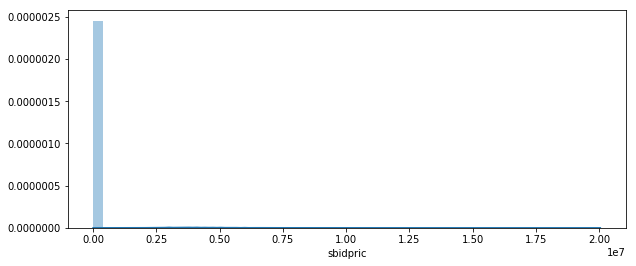

In [8]:
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(df_train['sbidpric'])

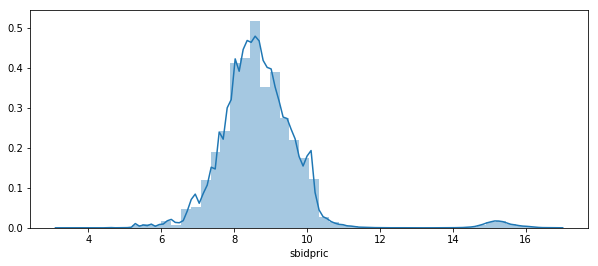

In [9]:
df_train['sbidpric'] = np.log1p(df_train['sbidpric'])
#histogram
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(df_train['sbidpric'])

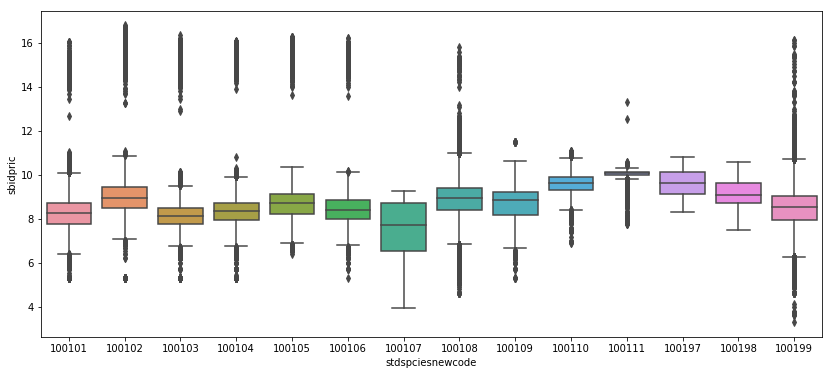

In [10]:
data = pd.concat([df_train['sbidpric'], df_train['stdspciesnewcode']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='stdspciesnewcode', y="sbidpric", data=data)

In [15]:
df_train['sbidpric'].head

<bound method NDFrame.head of 0         8.853808
1         9.024131
2         8.867991
3         8.909370
4         8.853808
5         8.867991
6         8.188967
7         8.318986
8         8.006701
9         8.268988
10        8.243019
11        8.188967
12        8.810012
13        8.343078
14        8.188967
15        8.630700
16        8.575651
17        8.160804
18        8.160804
19        8.131825
20        8.131825
21        8.006701
22        8.006701
23        7.824446
24        8.243019
25        8.160804
26        7.824446
27        8.006701
28        8.101981
29        7.741099
            ...   
470204    9.462732
470205    8.517393
470206    8.517393
470207    8.517393
470208    8.517393
470209    8.987322
470210    9.082621
470211    8.294300
470212    8.412055
470213    8.412055
470214    8.412055
470215    8.412055
470216    8.433812
470217    8.294300
470218    8.949105
470219    8.949105
470220    8.949105
470221    8.949105
470222    8.949105
470223    7.313887
4

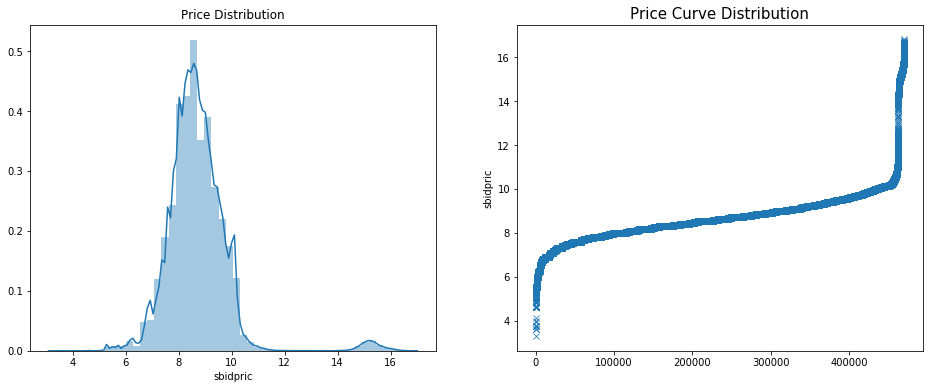

In [13]:
f, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.distplot(df_train['sbidpric'], ax=ax[0])
ax[0].set_title('Price Distribution')
plt.xlim()

sns.scatterplot(range(df_train.shape[0]), df_train['sbidpric'].sort_values(), ax=ax[1], marker="x")
ax[1].set_title('Price Curve Distribution', fontsize=15)

plt.show()

## 코드 분포

In [31]:
df_train[['stdunitnewcode','stdunitnewnm']].sort_values(by=['stdunitnewcode']).drop_duplicates()

,stdunitnewcode,stdunitnewnm
49552,11,g
311568,12,kg
113987,13,ton


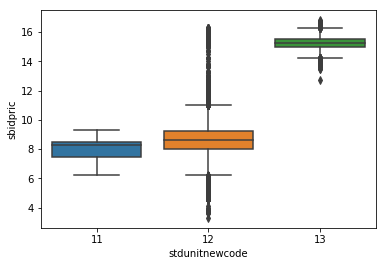

In [32]:
data = pd.concat([df_train['sbidpric'], df_train['stdunitnewcode']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='stdunitnewcode', y="sbidpric", data=data)

## 날짜 별로 가격 추이 확인

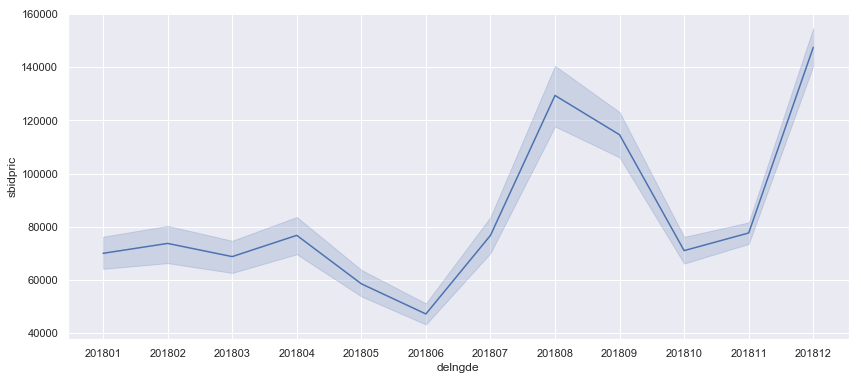

In [88]:
dt = df[['delngde','sbidpric']]

dt['delngde'] = dt['delngde'].apply(lambda x : str(x)[0:6])

# dt = dt.groupby(['delngde'], as_index=False)['sbidpric'].mean()

# data = pd.concat([df_train['sbidpric'], df_train['sbidpric']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.lineplot(x='delngde', y="sbidpric", data=dt)

#### 2015-2018 통합 추세 확인

In [146]:
df1 = pd.read_csv("./save_data/2015010120151231.csv")
df2 = pd.read_csv("./save_data/2016010120161231.csv")
df3 = pd.read_csv("./save_data/2017010120171231.csv")
df4 = pd.read_csv("./save_data/2018010120181231.csv")
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(461926, 44)
(485004, 44)
(515045, 44)
(470234, 44)


In [154]:
def aaaa(df):
    dt = df[['delngde','sbidpric']]
    dt['delngde'] = df['delngde'].apply(lambda x : str(x)[0:6])
    dt['year'] = df['delngde'].apply(lambda x : str(x)[0:4])
    dt['month'] =  df['delngde'].apply(lambda x : str(x)[4:6])
    return dt

In [156]:
df2015_2018 = aaaa(df1)
df2015_2018 = df2015_2018.append(aaaa(df2))
df2015_2018 = df2015_2018.append(aaaa(df3))
df2015_2018 = df2015_2018.append(aaaa(df4))

2015
2016
2017
2018


In [171]:
# 오류 떠서 변환시켜줌
df2015_2018['year'] = df2015_2018['year'].apply(int)

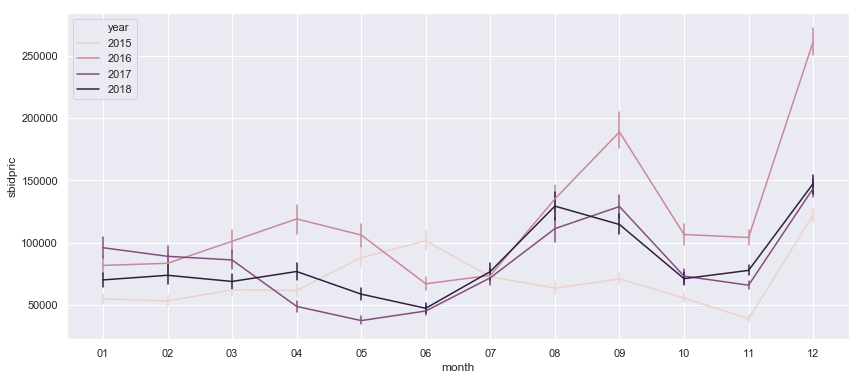

In [174]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.lineplot(x="month", y="sbidpric", hue="year", err_style="bars", data=df2015_2018)

## 날짜별 물량 정보 확인

In [181]:
df4[(df4['delngde']==20180127) & (df4['aucsecode']==2)]

,aucsecode,aucsenm,catgorycode,catgorynewcode,catgorynewnm,catgorynm,cprinsttcode,cprinsttnewcode,cprmtccode,cpruseprdlstcode,...,stdspciescode,stdspciesnewcode,stdspciesnewnm,stdspciesnm,stdunitnewcode,stdunitnewnm,whsalmrktcode,whsalmrktnewcode,whsalmrktnewnm,whsalmrktnm
28780,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28781,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28842,2,정가수의,10,10,엽경채류,엽경채류,11000103,6005604,537000,NaN,...,100101,100101,봄배추,봄배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28877,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28878,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28894,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28895,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28896,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28897,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28898,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장


In [ ]:
df4[(df4['delngde']==20180127) & (df4['aucsecode']==2)]

In [185]:
ddd = df3[(df3['delngde']>=20170401) & (df3['delngde']<=20170430)]

In [187]:
ddd.to_csv("asd.csv", index=False, encoding='utf-8-sig')